In [67]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt

agent = 'B-3'

with open(f'./agents/{agent}/epochs.json') as file:
  epochs = json.load(file)
with open(f'./agents/{agent}/evaluations.json') as file:
  evaluations = json.load(file)

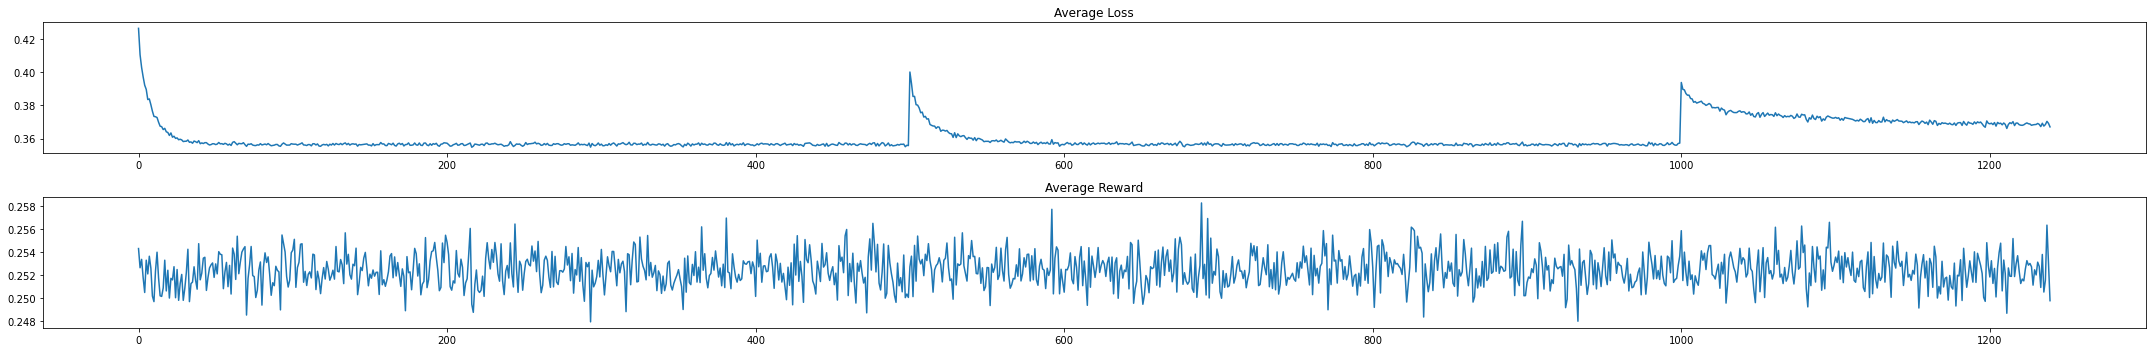

In [68]:
x = [i['epoch'] for i in epochs][:]
y_loss = [i['loss']**0.5 for i in epochs if i['epoch'] in x]
y_rewards = [i['reward'] for i in epochs if i['epoch'] in x]

figure, axis = plt.subplots(2,1)
figure.set_figheight(5)
figure.set_figwidth(30)

axis[0].set_title("Average Loss")
axis[0].plot(x,y_loss)

axis[1].set_title("Average Reward")
axis[1].plot(x,y_rewards)

figure.tight_layout()


<BarContainer object of 17 artists>

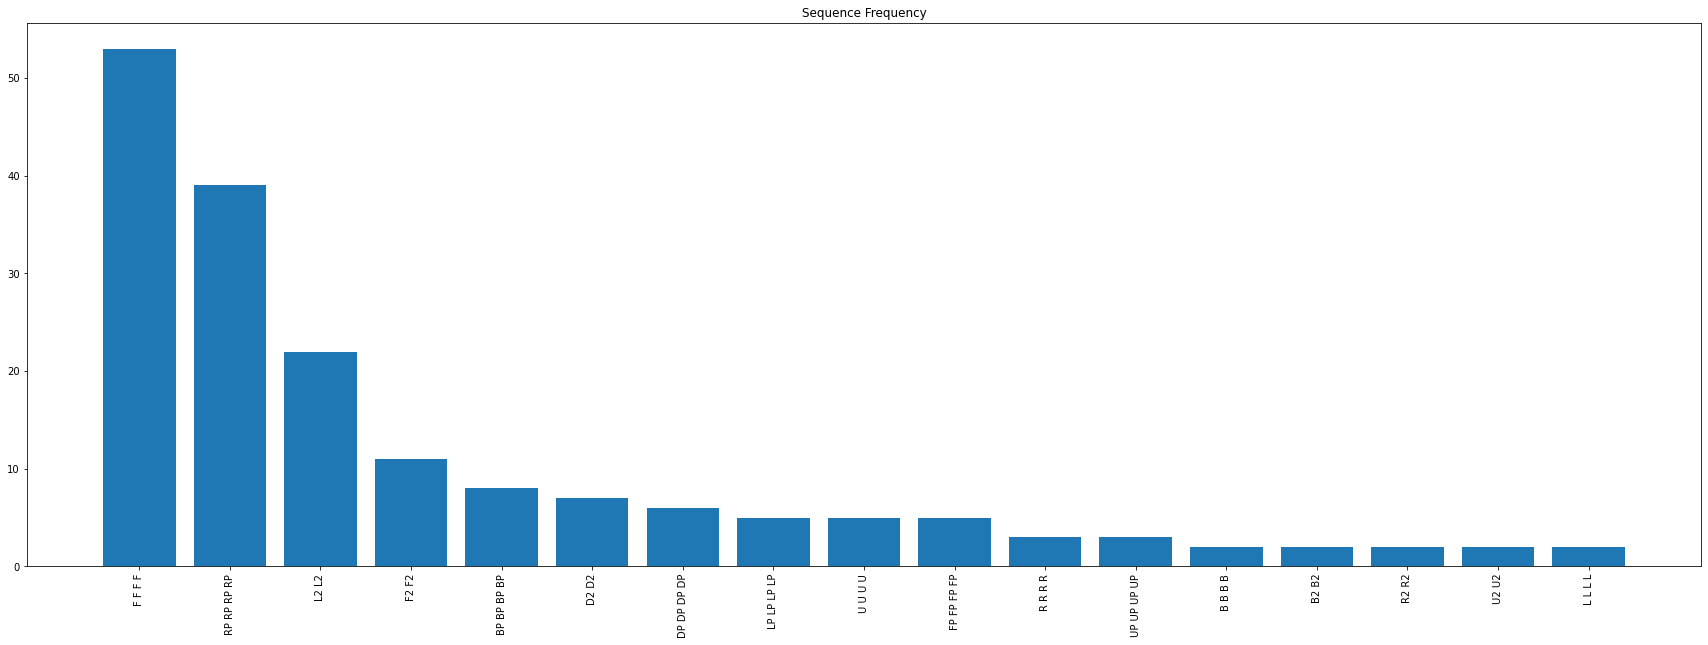

In [69]:
sequences = {}
lengths = {}

for i in evaluations:
  sequence = " ".join(i['moves'])
  if sequence in sequences:
    sequences[sequence] += 1
  else:
    sequences[sequence] = 1
  if len(i['moves']) in lengths:
    lengths[len(i['moves'])] += 1
  else:
    lengths[len(i['moves'])] = 1

# sort sequences by frequency
sequences = {k: v for k, v in sorted(sequences.items(), key=lambda item: item[1], reverse=True)}

# plot sequences
plt.figure(figsize=(30,10))
plt.title("Sequence Frequency")

plt.xticks(rotation=90)
plt.bar(sequences.keys(), sequences.values())



In [70]:
for sequence in sequences:
  print(sequences[sequence],'\t',sequence)

53 	 F F F F
39 	 RP RP RP RP
22 	 L2 L2
11 	 F2 F2
8 	 BP BP BP BP
7 	 D2 D2
6 	 DP DP DP DP
5 	 LP LP LP LP
5 	 U U U U
5 	 FP FP FP FP
3 	 R R R R
3 	 UP UP UP UP
2 	 B B B B
2 	 B2 B2
2 	 R2 R2
2 	 U2 U2
2 	 L L L L


<BarContainer object of 2 artists>

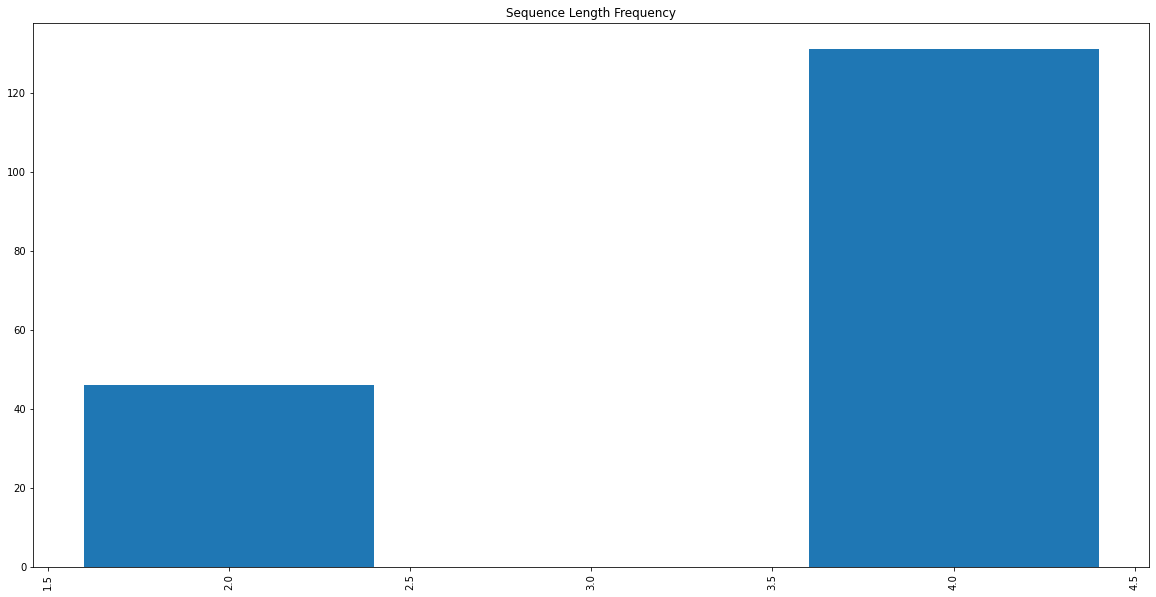

In [71]:

plt.figure(figsize=(20,10))
plt.title("Sequence Length Frequency")
plt.xticks(rotation=90)
plt.bar(lengths.keys(), lengths.values())


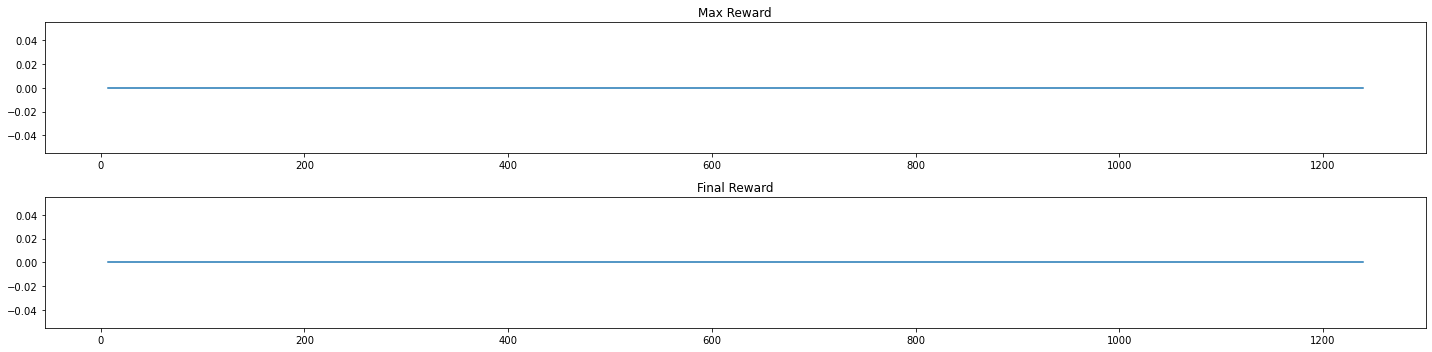

In [72]:
epochs = [x['epoch'] for x in evaluations]
max_rewards = [x['reward_max'] for x in evaluations if x['epoch'] in epochs]
final_rewards = [x['reward_final'] for x in evaluations if x['epoch'] in epochs]

figure, axis = plt.subplots(2,1)
figure.set_figheight(5)
figure.set_figwidth(20)

axis[0].set_title("Max Reward")
axis[0].plot(epochs,max_rewards)

axis[1].set_title("Final Reward")
axis[1].plot(epochs,final_rewards)

figure.tight_layout()